# Visualizing Errors

## Basic Errorbars

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

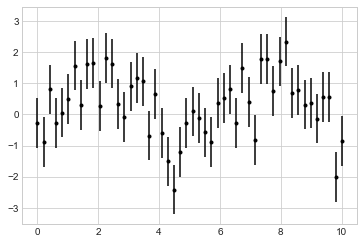

In [4]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

fmt is a format code conttolling the appearence of lines and points

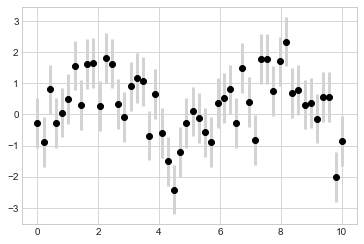

In [8]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

## Continuous Errors

In [37]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x* np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], eval_MSE=True)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE) # 2*sigma ~ 95% confidence region

TypeError: fit() got an unexpected keyword argument 'eval'

NameError: name 'xfit' is not defined

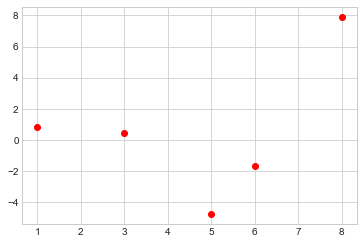

In [38]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_betwen(xfit, yfit, -dyfit, yfit + dyfit,
                colot='gray', alpha=0.2)
plt.xlim(0, 10);